Задание 1


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
data=boston['data']
feature_names=boston['feature_names']
target=boston['target']
X=pd.DataFrame(data, columns=feature_names)
y=pd.DataFrame(target, columns=['price'])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [5]:
from sklearn.metrics import r2_score
r2=round(r2_score(y_test, y_pred),2)
r2

0.71

Задание 2

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
y_train_v=y_train.values[:,0]
model.fit(X_train, y_train_v)
y_pred = model.predict(X_test)
r2_rfr=round(r2_score(y_test, y_pred),2)
r2_rfr

0.87

Вторая модель работает лучше, так как коэффициент детерминации выше

Задание 3

In [ ]:
help(RandomForestRegressor())

<BarContainer object of 13 artists>

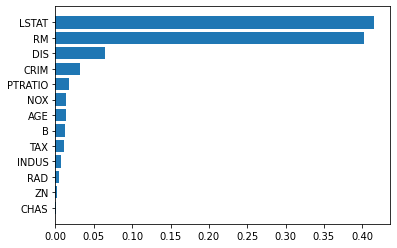

In [8]:
import matplotlib.pyplot as plt
sorted_importance=model.feature_importances_.argsort()
plt.barh(feature_names[sorted_importance], model.feature_importances_[sorted_importance])

Наибольшую важность показывают признаки LSTAT и RM

Задание 4

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
url='/content/drive/MyDrive/Colab Notebooks/Lesson2/creditcard.csv'
ab=pd.read_csv(url)
df = pd.DataFrame(ab)
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df.info()

In [ ]:
pd.options.display.max_columns = 100
df.loc[:10,:]

In [34]:
X = df.drop('Class', axis=1)
y=pd.Series(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [39]:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
svc = RandomForestClassifier(random_state=100)
clf = GridSearchCV(svc, parameters, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [41]:
print(clf.best_params_)

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


In [45]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [48]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, y_pred_proba), 2)

0.95